<a href="https://colab.research.google.com/github/bereml/iap/blob/master/libretas/2d_audio_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro al procesamiento de audio para AP

Curso: [Introducción al Aprendizaje Profundo](http://turing.iimas.unam.mx/~ricardoml/course/iap/). Profesores: [Bere](https://turing.iimas.unam.mx/~bereml/) y [Ricardo](https://turing.iimas.unam.mx/~ricardoml/) Montalvo Lezama.

---
---

En esta libreta nos familiarizaremos en como crear y manipular formas de onda y espectogramas como representaciones para modelos de aprendizaje profundo. 

## 1. Preparación

In [1]:
# Colab
! pip install torchinfo
try:
    import torchaudio
except:
    ! pip install torchaudio

### 1.1. Bibliotecas

In [2]:
import collections
from os.path import join

import librosa
import librosa.display
import IPython as ip
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
import torchaudio.transforms as T

# barras de progreso
from tqdm.auto import trange

### 1.2. Auxiliares

In [3]:
DATA_DIR = '../datos/gtzan'

## 2. Datos

In [4]:
! mkdir -p {DATA_DIR}

In [5]:
ds = torchaudio.datasets.GTZAN(DATA_DIR, download=True)

In [6]:
! ls -R {DATA_DIR} | head -35

../datos/gtzan:
genres
genres.tar.gz

../datos/gtzan/genres:
bextract_single.mf
bl.mf
blues
cl.mf
classical
co.mf
country
di.mf
disco
hi.mf
hiphop
input.mf
ja.mf
jazz
me.mf
metal
po.mf
pop
re.mf
reggae
ro.mf
rock

../datos/gtzan/genres/blues:
blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
ls: write error: Broken pipe


In [7]:
len(ds)

1000

## 3. Exploración

### 3.1 Examinemos un ejemplo

In [8]:
waveform, sample_rate, label = ds[0]

print(
    f'Etiqueta: {label}\n'
    f'Forma de onda: {waveform.shape}\n'
    f'Frecuencia de muestreo: {sample_rate}\n'
    f'Duración: {waveform.shape[1] / sample_rate}\n'
    f'Tipo: {waveform.dtype}\n'
)

Etiqueta: blues
Forma de onda: torch.Size([1, 661794])
Frecuencia de muestreo: 22050
Duración: 30.013333333333332
Tipo: torch.float32



In [9]:
waveform

tensor([[ 0.0073,  0.0166,  0.0076,  ..., -0.0556, -0.0611, -0.0642]])

### 3.2 Duraciones del conjunto

In [10]:
durations = []
for i in trange(len(ds)):
    waveform, sample_rate, label = ds[i]
    num_channels, samples = waveform.shape
    durations.append(samples)

  0%|          | 0/1000 [00:00<?, ?it/s]

Duraciones
Counter({661794: 640, 661504: 295, 675808: 10, 661408: 5, 661676: 4, 661760: 4, 669680: 3, 665280: 3, 667920: 3, 669240: 3, 663520: 2, 661344: 2, 663300: 2, 666820: 2, 668140: 2, 670120: 1, 672282: 1, 663080: 1, 668800: 1, 661100: 1, 663740: 1, 664180: 1, 666160: 1, 665060: 1, 664400: 1, 660000: 1, 667700: 1, 665940: 1, 662112: 1, 672100: 1, 661980: 1, 667480: 1, 661500: 1, 670340: 1, 669460: 1})


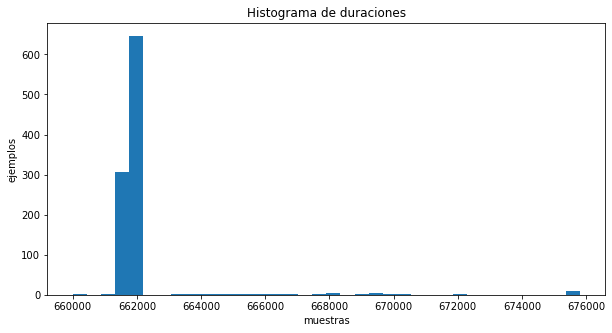

In [11]:
counter = collections.Counter(durations)

print('Duraciones')
print(counter)

plt.figure(figsize=(10, 5))
plt.hist(durations, bins=len(counter.keys())+1)
plt.bar(counter.keys(), counter.values())
plt.title('Histograma de duraciones')
plt.xlabel('muestras')
plt.ylabel('ejemplos')
plt.show()

In [12]:
# número mínimo de muestras
min_samples = min(counter.keys())
min_samples

660000

## 4. Formas de onda

### 4.1 Audio A

In [13]:
# leemos el primer ejemplo
waveformA, sample_rateA, labelA = ds[0]

# comvertimos a numpy para ipython y librosa
waveformA_numpy = waveformA.flatten().numpy()

print(
    f'Etiqueta: {labelA}\n'
    f'Forma de onda (forma torch): {waveformA.shape}\n'
    f'Forma de onda (forma numpy): {waveformA_numpy.shape}\n'
    f'Frecuencia de muestreo: {sample_rateA}\n'
    f'Duración: {waveformA_numpy.shape[0] / sample_rateA}\n'
    f'Tipo: {waveformA.dtype}'
)

Etiqueta: blues
Forma de onda (forma torch): torch.Size([1, 661794])
Forma de onda (forma numpy): (661794,)
Frecuencia de muestreo: 22050
Duración: 30.013333333333332
Tipo: torch.float32


In [14]:
# reproducimos
ip.display.Audio(waveformA_numpy, rate=sample_rateA)

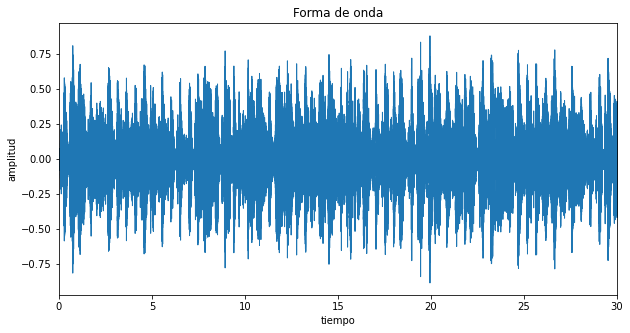

In [15]:
# graficámos la forma de onda
plt.figure(figsize=(10, 5))
librosa.display.waveplot(waveformA_numpy, sr=sample_rateA)
plt.title('Forma de onda')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.show()

### 4.2 Audio B

In [16]:
# leemos el primer ejemplo
waveformB, sample_rateB, labelB = ds[350]

# comvertimos a numpy para ipython y librosa
waveformB_numpy = waveformB.flatten().numpy()

print(
    f'Etiqueta: {labelB}\n'
    f'Forma de onda (forma torch): {waveformB.shape}\n'
    f'Forma de onda (forma numpy): {waveformB_numpy.shape}\n'
    f'Frecuencia de muestreo: {sample_rateB}\n'
    f'Duración: {waveformB_numpy.shape[0] / sample_rateB}\n'
    f'Tipo: {waveformB.dtype}'
)

Etiqueta: disco
Forma de onda (forma torch): torch.Size([1, 661504])
Forma de onda (forma numpy): (661504,)
Frecuencia de muestreo: 22050
Duración: 30.00018140589569
Tipo: torch.float32


In [17]:
# reproducimos
ip.display.Audio(waveformB_numpy, rate=sample_rateB)

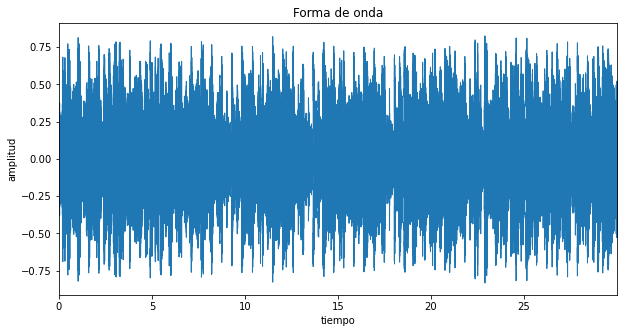

In [18]:
# graficámos la forma de onda
plt.figure(figsize=(10, 5))
librosa.display.waveplot(waveformB_numpy, sr=sample_rateB)
plt.title('Forma de onda')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.show()

### 4.3 Mezclando audios

In [19]:
# recortamos los audios al mínimo número de muestras
waveformA_numpy = waveformA_numpy[:min_samples]
waveformB_numpy = waveformB_numpy[:min_samples]

# promediamos las amplitudes a lo largo del tiempo
waveformC_numpy = (waveformA_numpy + waveformB_numpy) / 2
# promediamos las frecuencias de muestreo
sample_rateC = (sample_rateA + sample_rateB) // 2

print(
    f'Etiqueta: {labelA} + {labelB}\n'
    f'Forma de onda (forma numpy): {waveformC_numpy.shape}\n'
    f'Frecuencia de muestreo: {sample_rateC}\n'
    f'Duración: {waveformC_numpy.shape[0] / sample_rateC}\n'
    f'Tipo: {waveformC_numpy.dtype}'
)

Etiqueta: blues + disco
Forma de onda (forma numpy): (660000,)
Frecuencia de muestreo: 22050
Duración: 29.931972789115648
Tipo: float32


In [20]:
# reproducimos
ip.display.Audio(waveformC_numpy, rate=sample_rateC)

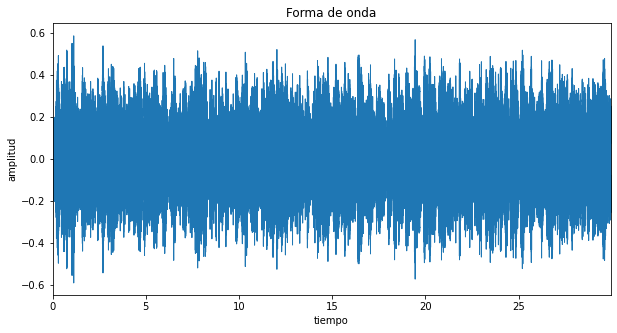

In [21]:
# graficámos la forma de onda
plt.figure(figsize=(10, 5))
librosa.display.waveplot(waveformC_numpy, sr=sample_rateC)
plt.title('Forma de onda')
plt.xlabel('tiempo')
plt.ylabel('amplitud')
plt.show()

## 5. Características

<img src="https://es.mathworks.com/help/dsp/ref/stft_windowed_segments.png"/>
Imagen tomada de https://es.mathworks.com/help/dsp/ref/dsp.stft.html.

In [22]:
# tamaño de la ventana
n_fft = 400
# tamaño del salto
hop_length = n_fft // 2

### 5.1 Espectrogramas

In [23]:
spectrogram = T.Spectrogram(n_fft=n_fft, hop_length=hop_length)(waveformA)
print(spectrogram.shape, spectrogram.dtype)
spectrogram

torch.Size([1, 201, 3309]) torch.float32


tensor([[[1.6872e+01, 1.4136e-01, 2.6128e-01,  ..., 1.8532e+01,
          5.3009e+01, 1.2107e+02],
         [3.5864e+00, 2.7228e+00, 5.2901e+00,  ..., 2.0548e+02,
          8.7730e+01, 9.3644e+01],
         [5.5366e-01, 7.3058e-01, 2.2719e+00,  ..., 4.5018e+02,
          1.8380e+02, 1.8382e+01],
         ...,
         [7.2302e-05, 1.0708e-08, 3.0015e-09,  ..., 5.8947e-09,
          4.4042e-10, 1.3328e-08],
         [6.9586e-05, 2.1749e-08, 4.1176e-10,  ..., 6.5292e-09,
          1.5210e-08, 4.6985e-09],
         [6.7681e-05, 4.7085e-08, 1.3613e-09,  ..., 8.4694e-09,
          1.9653e-08, 7.3669e-11]]])

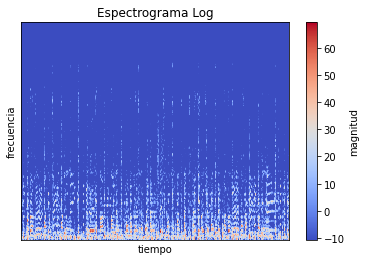

In [24]:
spectrogram_numpy = spectrogram.squeeze().numpy()
log_spectrogram = librosa.amplitude_to_db(spectrogram_numpy)

librosa.display.specshow(log_spectrogram, 
                         sr=sample_rateA, hop_length=hop_length)
plt.title('Espectrograma Log')
plt.xlabel('tiempo')
plt.ylabel('frecuencia')
cbar = plt.colorbar()
cbar.set_label('magnitud', rotation=90)
plt.show()

### 5.2 Espectograma Log-Mel

In [25]:
mel_spectrogram = T.MelSpectrogram(n_fft=n_fft, hop_length=hop_length)(waveformA)
print(mel_spectrogram.shape, mel_spectrogram.dtype)
mel_spectrogram

torch.Size([1, 128, 3309]) torch.float32


/home/richardt/.miniconda3/envs/iap/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [5.6175e-01, 4.2648e-01, 8.2862e-01,  ..., 3.2185e+01,
          1.3742e+01, 1.4668e+01],
         [3.0246e+00, 2.2963e+00, 4.4615e+00,  ..., 1.7329e+02,
          7.3989e+01, 7.8976e+01],
         ...,
         [3.0041e-04, 2.2091e-07, 1.6978e-07,  ..., 1.3981e-06,
          8.2063e-07, 2.3189e-06],
         [3.0010e-04, 7.6331e-08, 7.2946e-08,  ..., 5.8288e-08,
          1.3919e-07, 9.2050e-08],
         [2.9917e-04, 4.8792e-08, 3.1123e-08,  ..., 4.0554e-08,
          5.3490e-08, 1.1126e-07]]])

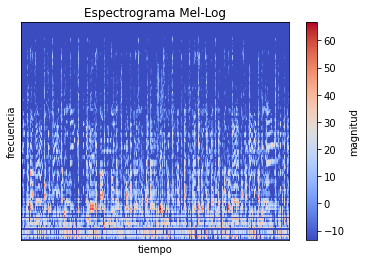

In [26]:
mel_spectrogram_numpy = mel_spectrogram.squeeze().numpy()
log_mel_spectrogram_numpy = librosa.amplitude_to_db(mel_spectrogram_numpy)

librosa.display.specshow(log_mel_spectrogram_numpy, 
                         sr=sample_rateA, hop_length=hop_length)
plt.title('Espectrograma Mel-Log')
plt.xlabel('tiempo')
plt.ylabel('frecuencia')
cbar = plt.colorbar()
cbar.set_label('magnitud', rotation=90)
plt.show()

### 5.3 MFCCs

In [27]:
mfccs = T.MFCC()(waveformA)
print(mfccs.shape, mfccs.dtype)
mfccs

torch.Size([1, 40, 3309]) torch.float32


tensor([[[-209.8123, -192.0418, -199.1384,  ...,  -75.5700,  -65.6713,
           -86.1806],
         [  45.6126,   61.9238,   64.3109,  ...,   93.5290,  105.6392,
            94.6018],
         [ -29.4638,  -35.9954,  -36.4027,  ...,  -70.3407,  -58.8670,
           -63.7133],
         ...,
         [  -6.9590,   -4.1896,   -9.6541,  ...,   -9.1590,  -13.0265,
           -10.3158],
         [  -4.9309,  -13.1121,    2.3673,  ...,   -5.3655,  -14.9828,
            -9.4577],
         [  -7.1055,  -15.4825,   -3.8887,  ...,    0.5357,  -13.1433,
           -17.1106]]])

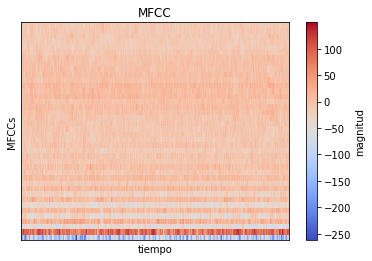

In [28]:
mfccs_numpy = mfccs.squeeze().numpy()

librosa.display.specshow(mfccs_numpy, sr=sample_rateA, hop_length=hop_length)
plt.title('MFCC')
plt.xlabel('tiempo')
plt.ylabel('MFCCs')
cbar = plt.colorbar()
cbar.set_label('magnitud', rotation=90)
plt.show()